In [7]:
from xml.etree import ElementTree
import glob
from tensorflow import keras
import tensorflow as tf
import sklearn
from skimage import draw
from skimage.io import imshow, imread
from skimage import morphology
from skimage import transform
from skimage import util
import numpy as np
from matplotlib import pyplot
#from tensorflow import keras
#import tensorflow as tf
from tensorflow.keras import layers, losses, optimizers, Model
from tensorflow.keras.utils import  plot_model

tf.keras.backend.set_image_data_format('channels_last')

In [8]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [9]:
et = ElementTree.parse("CVATdata/annotations.xml")

In [10]:
image_names = sorted(glob.glob("CVATdata/images/training/*.png"))
image_names = list(map(lambda x: x.replace("\\", "/"), image_names))


In [11]:
masks = {}
for img in et.findall('image'):
    width = int(img.attrib['width']) + 1
    height = int(img.attrib['height']) + 1
    blank = np.zeros(shape=(height,width),dtype=np.uint8)
    polys = img.findall('polyline')
    for poly in polys:
        attribs = poly.attrib
        pstr = attribs['points']
        pairs = pstr.split(';')
        coord_list = []
        for pair in pairs:
            xstr,ystr = pair.split(',')
            x = float(xstr)
            y = float(ystr)
            coord_list.append((x,y))
        for i in range(len(coord_list) - 1):
            start = coord_list[i]
            end = coord_list[i + 1]
            line = draw.line(round(start[1]),round(start[0]),round(end[1]),round(end[0]))
            blank[line] = np.uint8(255)
    masks[img.attrib['name']] = blank
print(list(masks.keys())[0])


training/img0_1.png


In [12]:
images = {}
for name in image_names:
    data = imread(name)
    images[name] = data

In [13]:
image_names[0]
print(image_names)

['CVATdata/images/training/img0_1.png', 'CVATdata/images/training/img0_2.png', 'CVATdata/images/training/img0_3.png', 'CVATdata/images/training/img13_1.png', 'CVATdata/images/training/img13_2.png', 'CVATdata/images/training/img13_3.png', 'CVATdata/images/training/img14_1.png', 'CVATdata/images/training/img14_2.png', 'CVATdata/images/training/img14_3.png', 'CVATdata/images/training/img16_3.png', 'CVATdata/images/training/img19_1.png', 'CVATdata/images/training/img19_2.png', 'CVATdata/images/training/img19_3.png', 'CVATdata/images/training/img1_1.png', 'CVATdata/images/training/img1_2.png', 'CVATdata/images/training/img1_3.png', 'CVATdata/images/training/img20_1.png', 'CVATdata/images/training/img20_2.png', 'CVATdata/images/training/img20_3.png', 'CVATdata/images/training/img21_1.png', 'CVATdata/images/training/img21_2.png', 'CVATdata/images/training/img21_3.png', 'CVATdata/images/training/img22_1.png', 'CVATdata/images/training/img22_2.png', 'CVATdata/images/training/img22_3.png', 'CVAT

In [14]:
names = [image_name[16:] for image_name in image_names]
print(names)

['training/img0_1.png', 'training/img0_2.png', 'training/img0_3.png', 'training/img13_1.png', 'training/img13_2.png', 'training/img13_3.png', 'training/img14_1.png', 'training/img14_2.png', 'training/img14_3.png', 'training/img16_3.png', 'training/img19_1.png', 'training/img19_2.png', 'training/img19_3.png', 'training/img1_1.png', 'training/img1_2.png', 'training/img1_3.png', 'training/img20_1.png', 'training/img20_2.png', 'training/img20_3.png', 'training/img21_1.png', 'training/img21_2.png', 'training/img21_3.png', 'training/img22_1.png', 'training/img22_2.png', 'training/img22_3.png', 'training/img23_1.png', 'training/img23_2.png', 'training/img23_3.png', 'training/img24_1.png', 'training/img24_2.png', 'training/img25_1.png', 'training/img25_2.png', 'training/img25_3.png', 'training/img26_1.png', 'training/img26_2.png', 'training/img26_3.png', 'training/img27_1.png', 'training/img27_2.png', 'training/img27_3.png', 'training/img28_1.png', 'training/img28_2.png', 'training/img28_3.png

In [15]:
pairs = []
cross = zip(names, image_names)
for short_name, long_name in cross:
    mask = masks[short_name]
    trainee = images[long_name]
    pairs.append((trainee, morphology.dilation(mask[:-1,:-1])))

(600, 45) (600, 45)


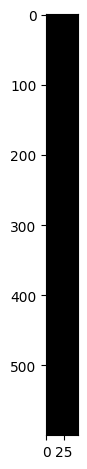

(600, 44) (600, 44)


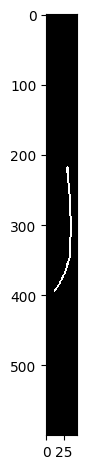

(600, 45) (600, 45)


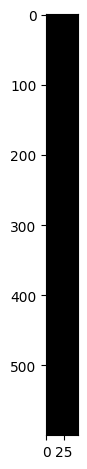

(600, 39) (600, 39)


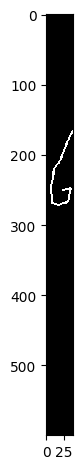

(600, 40) (600, 40)


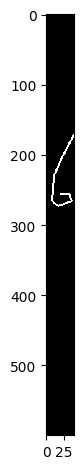

(600, 40) (600, 40)


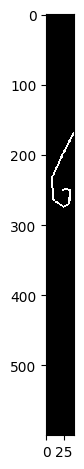

(600, 39) (600, 39)


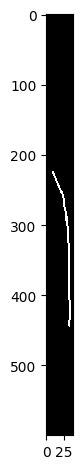

(600, 40) (600, 40)


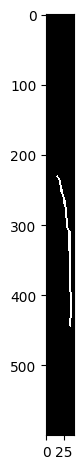

(600, 40) (600, 40)


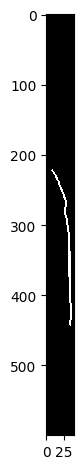

(600, 46) (600, 46)


c:\Users\tyler\anaconda3\envs\ML2\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:149: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


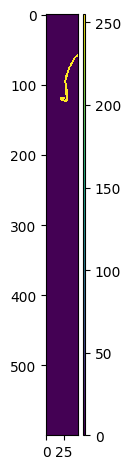

In [16]:
for p, i in zip(pairs, range(10)):
    print(p[0].shape, p[1].shape)
    imshow(p[1])
    pyplot.show()

In [17]:
with_probs = filter(lambda pair : pair[1].sum() > 0, pairs)

In [18]:
labeled_pairs = list(with_probs)

In [19]:
len(labeled_pairs)

75

In [20]:
reshaped_pairs = []
for inp, outp in labeled_pairs:
    inp2 = transform.resize(inp, (600, 100))
    outp2 = transform.resize(outp, (600, 100))
    reshaped_pairs.append((inp2, outp2))

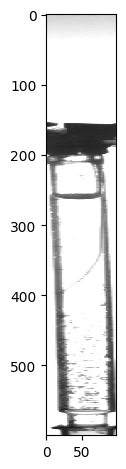

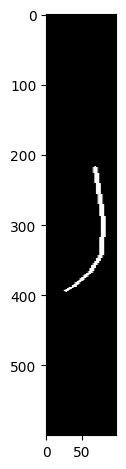

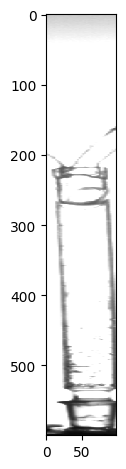

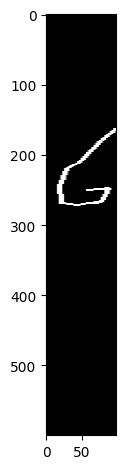

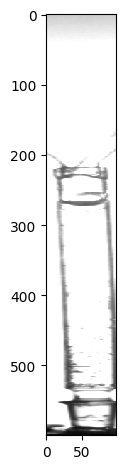

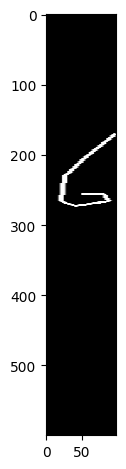

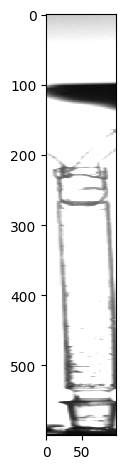

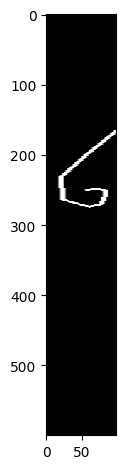

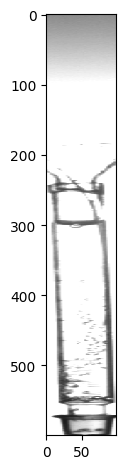

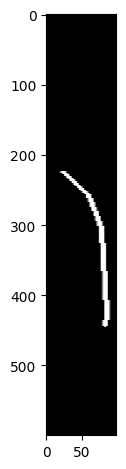

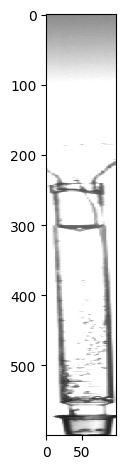

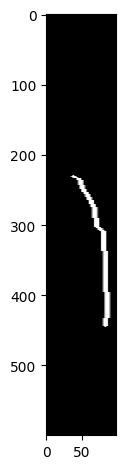

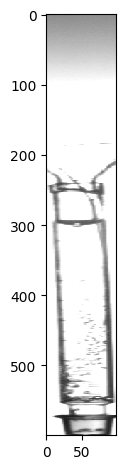

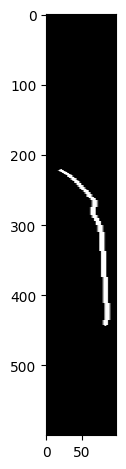

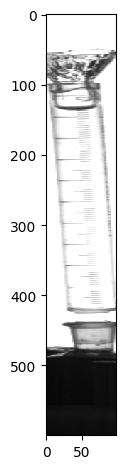

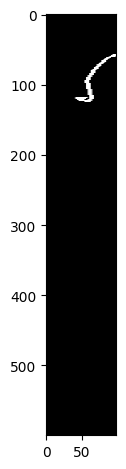

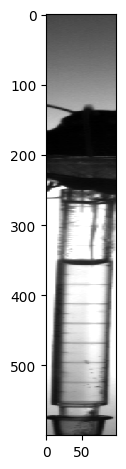

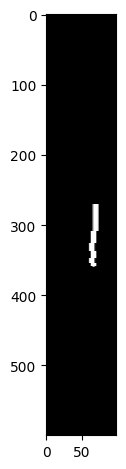

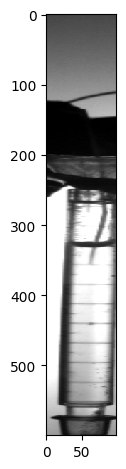

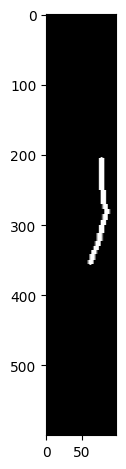

In [21]:
for (my_in, my_out), i in zip(reshaped_pairs, range(10)):
    imshow(my_in)
    pyplot.show()
    imshow(my_out)
    pyplot.show()

In [22]:
len(reshaped_pairs)

75

In [23]:
inputs = []
outputs = []
for my_in, my_out in reshaped_pairs:
    inputs.append(my_in)
    outputs.append(my_out)

In [24]:
ins = np.array(inputs)
outs = np.array(outputs)

In [25]:
ins.shape

(75, 600, 100)

In [26]:
outs.shape

(75, 600, 100)

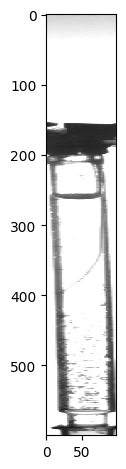

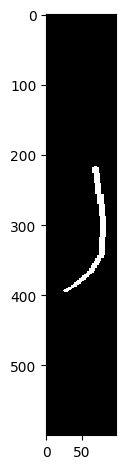

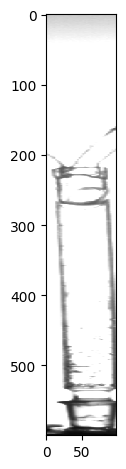

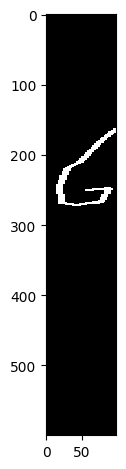

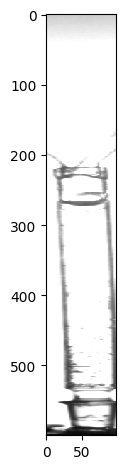

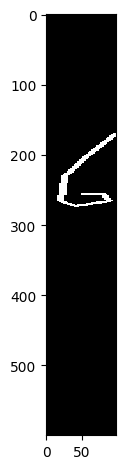

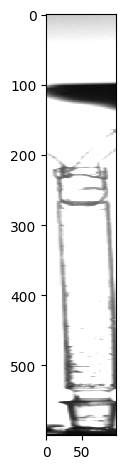

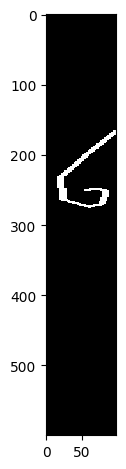

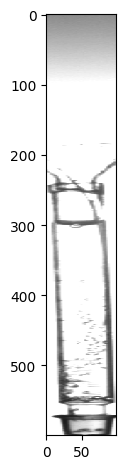

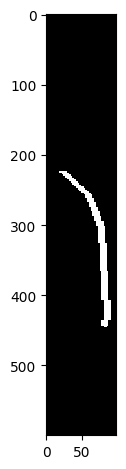

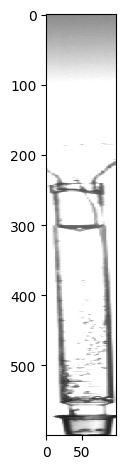

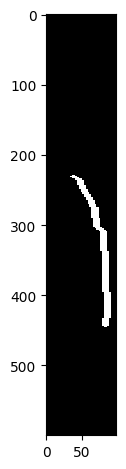

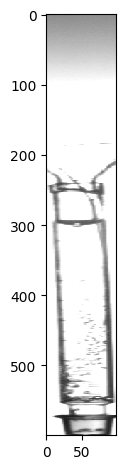

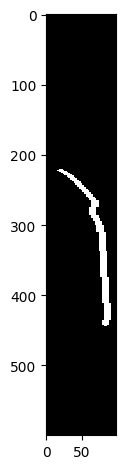

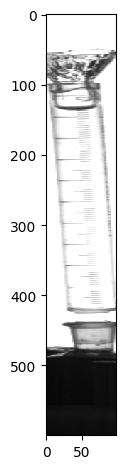

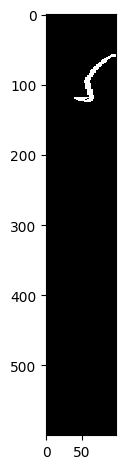

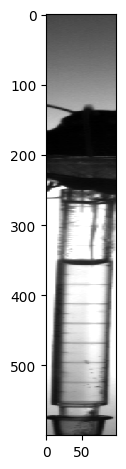

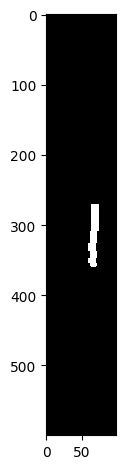

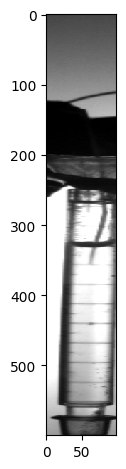

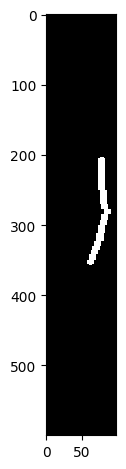

In [27]:
input_data = ins[...,np.newaxis]
output_data = outs[...,np.newaxis]
output_data = output_data != 0
for i in range(min(len(input_data), 10)):
    imshow(input_data[i,:,:,0])
    pyplot.show()
    imshow(output_data[i,:,:,0])
    pyplot.show()

In [28]:
# from https://blog.paperspace.com/unet-architecture-image-segmentation/

def convolution_block(input_lay, filters=64):
    conv1 = layers.Conv2D(filters, kernel_size=(3,3), padding="same")(input_lay)
    bn1 = layers.BatchNormalization()(conv1)
    act1 = layers.ReLU()(bn1)
    
    conv2 = layers.Conv2D(filters, kernel_size=(3,3), padding="same")(act1)
    bn2 = layers.BatchNormalization()(conv2)
    act2 = layers.ReLU()(bn2)
    
    return act2

def encoder(input_lay, filters=64):
    enc1 = convolution_block(input_lay, filters)
    max_pool1 = layers.MaxPooling2D()(enc1)
    return enc1, max_pool1

def decoder(input_lay, skip_lay, filters=64):
    upsample = layers.Conv2DTranspose(filters, (2,2), strides=2, padding="same")(input_lay)
    connect_skip = layers.Concatenate()([upsample, skip_lay])
    out = convolution_block(connect_skip, filters)
    return out

def u_net(image_size):
    input1 = layers.Input(image_size)
    
    skip1, enc1 = encoder(input1, 64)
    skip2, enc2 = encoder(enc1, 64 * 2)
    skip3, enc3 = encoder(enc2, 64 * 4)
    skip4, enc4 = encoder(enc3, 64 * 8)
    
    conv_block = convolution_block(enc4, 64*16)
    
    dec1 = decoder(conv_block, skip4, 64 * 8)
    dec2 = decoder(dec1, skip3, 64 * 4)
    dec3 = decoder(dec2, skip2, 64 * 2)
    dec4 = decoder(dec3, skip1, 64)
    
    out = layers.Conv2D(filters=1, kernel_size=(1,1), padding="same", activation="sigmoid")(dec4)
    
    model = Model(input1, out)
    
    return model

inp = layers.Input(shape=[600,100,1])
#x = layers.Conv2D(filters=4, kernel_size=(3,3))(res)

skip1, enc1 = encoder(inp, 64)
skip2, enc2 = encoder(enc1, 64 * 2)
#skip3, enc3 = encoder(enc2, 64 * 4)

conv_block = convolution_block(enc2, 64 * 4)

dec1 = decoder(conv_block, skip2, 64 * 2)
dec2 = decoder(dec1, skip1, 64)
#dec3 = decoder(dec2, skip1, 64)

f = layers.Flatten()(dec2)

#out = layers.Dense(1)(f)
out = layers.Conv2D(filters=1, kernel_size=(1,1))(dec2)

model = Model(inp, out)
model.compile(loss=losses.BinaryCrossentropy(), optimizer=optimizers.Adam())
plot_model(model)
model.summary()

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 600, 100, 1  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 600, 100, 1)  0           ['input_1[0][0]']                
                                                                                                  
 conv2d (Conv2D)                (None, 600, 100, 64  640         ['rescaling[0][0]']              
                                )           

In [29]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 600, 100, 1  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 600, 100, 1)  0           ['input_1[0][0]']                
                                                                                                  
 conv2d (Conv2D)                (None, 600, 100, 64  640         ['rescaling[0][0]']              
                                )                                                                 
                                                                                              

In [34]:
import math

class ImageSeq(keras.utils.Sequence):
    
    def __init__(self, ins: np.ndarray, outs: np.ndarray, batch=32):
        assert ins.shape == outs.shape
        self.inputs = np.copy(ins)
        self.outputs = np.copy(outs)
        self.batch = 4
    
    def __len__(self):
        return math.ceil(len(self.inputs) / self.batch)
    
    def __getitem__(self, idx):
        i = self.inputs[idx * self.batch : (idx + 1) * self.batch]
        o = self.outputs[idx * self.batch : (idx + 1) * self.batch]
        return i.astype(np.uint8), o.astype(np.uint8)
    

class RepeatSeq(keras.utils.Sequence):
    
    def __init__(self, wrapped, repeats :int):
        self.wrapped = wrapped
        self.repeats = repeats
    
    def __len__(self):
        return len(self.wrapped) * self.repeats
    
    def __getitem__(self, idx):
        rel_idx = idx % len(self.wrapped)
        i, o = self.wrapped[rel_idx]
        return np.copy(i), np.copy(o)
    
class RandomFlip(keras.utils.Sequence):
    
    def __init__(self, wrapped, thresh=0.4):
        self.wrapped = wrapped
        self.thresh = thresh
        self.should_flip = np.random.random(len(wrapped))
    
    def __len__(self):
        return len(self.wrapped)
    
    def __getitem__(self, idx):
        i, o = self.wrapped[idx]
        give_i = i[:]
        give_o = o[:]
        if self.should_flip[idx] > self.thresh:
            give_i = np.flip(give_i, axis=1)
            give_o = np.flip(give_o, axis=1)
        return give_i, give_o

class RandomXShift(keras.utils.Sequence):
    
    def __init__(self, wrapped, thresh=0.4):
        self.wrapped = wrapped
        self.move_likely = np.random.random(len(wrapped))
        self.thresh = thresh
        self.move_amount = np.random.randint(-20, 20, len(wrapped))
    
    def __len__(self):
        return len(self.wrapped)
    
    def __getitem__(self, idx):
        i, o = self.wrapped[idx]
        give_i = i[:]
        give_o = o[:]
        if self.move_likely[idx] > self.thresh:
            move = self.move_amount[idx]
            transl = transform.EuclideanTransform(translation=[move, 0])
            for j in range(len(give_i)):
                give_i[j] = util.img_as_ubyte(transform.warp(give_i[j], transl.inverse))
                give_o[j] = util.img_as_ubyte(transform.warp(give_o[j], transl.inverse))
        return give_i, give_o 

class RandomYShift(keras.utils.Sequence):
    
    def __init__(self, wrapped, thresh=0.4):
        self.wrapped = wrapped
        self.move_likely = np.random.random(len(wrapped))
        self.thresh = thresh
        self.move_amount = np.random.randint(-200, 200, len(wrapped))
    
    def __len__(self):
        return len(self.wrapped)
    
    def __getitem__(self, idx):
        i, o = self.wrapped[idx]
        give_i = i[:]
        give_o = o[:]
        if self.move_likely[idx] > self.thresh:
            move = self.move_amount[idx]
            transl = transform.EuclideanTransform(translation=[0, move])
            for j in range(len(give_i)):
                give_i[j] = util.img_as_ubyte(transform.warp(give_i[j], transl.inverse))
                give_o[j] = util.img_as_ubyte(transform.warp(give_o[j], transl.inverse))
        return give_i, give_o 

In [31]:
r = RandomYShift(RandomXShift(RandomFlip(RepeatSeq(ImageSeq(input_data, output_data), 16))))

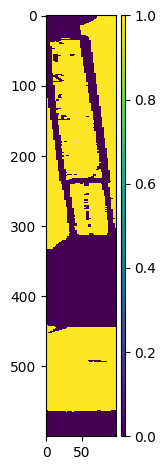

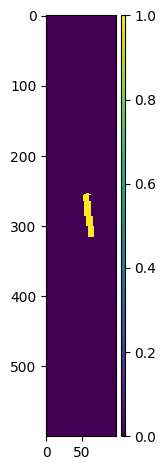

In [35]:
a,b = r[6]
imshow(a[0])
pyplot.show()
imshow(b[0])
pyplot.show()

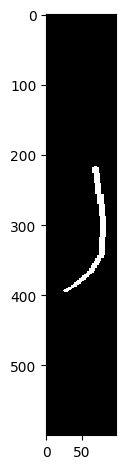

In [71]:
imshow(output_data[0])
pyplot.show()

In [72]:
model.fit(r)

304/304 [==============================] - 204s 665ms/step - loss: 0.3449


In [73]:
b = util.img_as_ubyte(input_data)

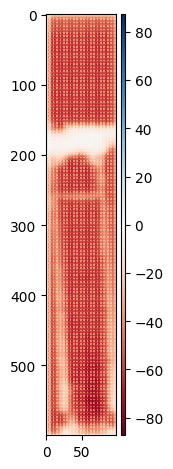

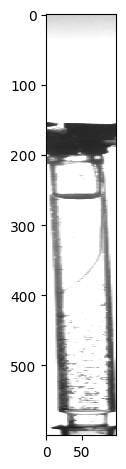

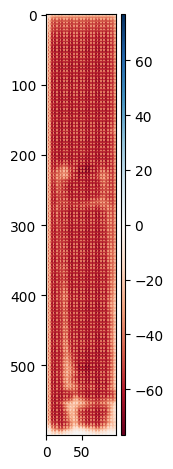

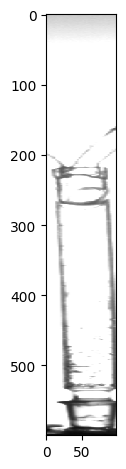

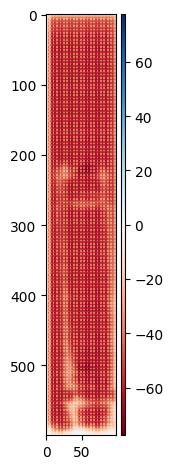

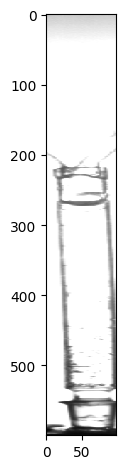

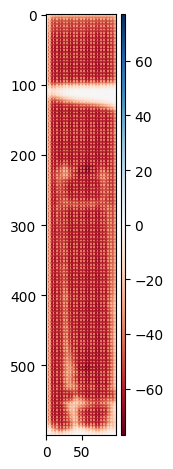

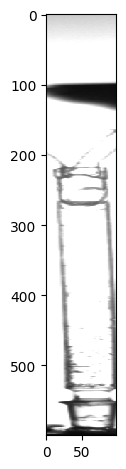

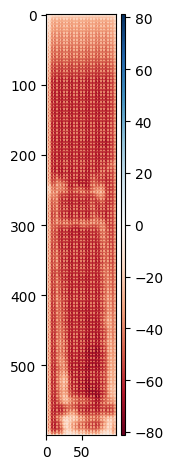

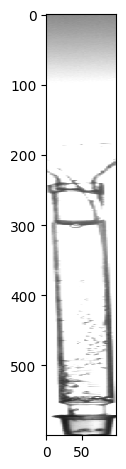

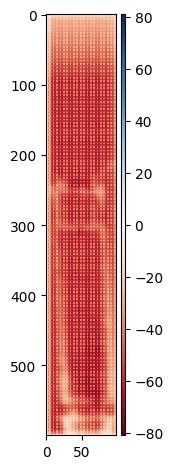

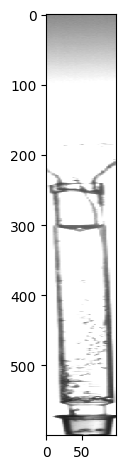

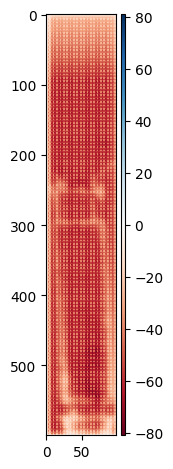

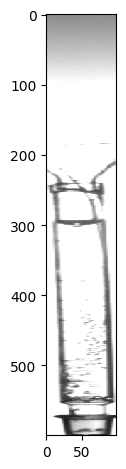

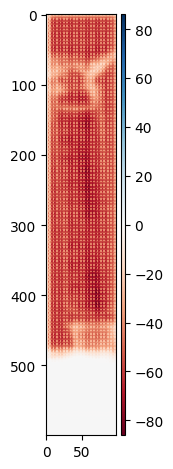

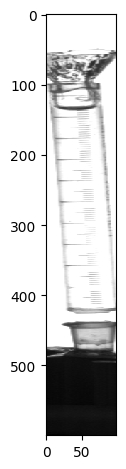

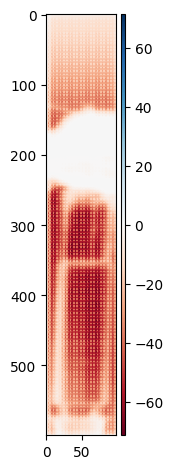

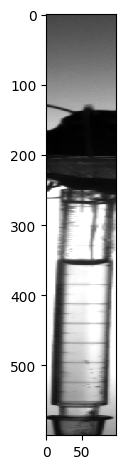

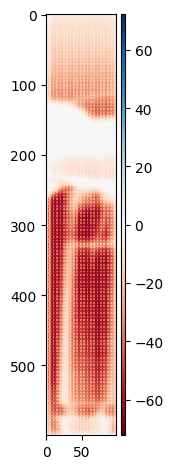

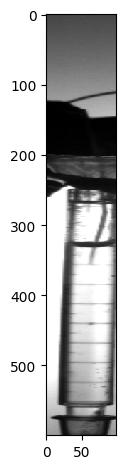

In [74]:
for image, _ in zip(b, range(10)):
    expanded_dim = np.expand_dims(image, axis=0)
    imshow(model(expanded_dim).numpy()[0])
    pyplot.show()
    imshow(image)
    pyplot.show()

In [42]:
model.save("proboscis_attempt_1")

INFO:tensorflow:Assets written to: proboscis_attempt_1\assets


INFO:tensorflow:Assets written to: proboscis_attempt_1\assets
